In [173]:
!pip install mlxtend


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Jay\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     -

In [162]:
import torch
import torchaudio
from load_data import UrbanSoundDataset
from cnn import CNNNetwork
import numpy as np

In [163]:
class_mapping = [
    "air_conditioner",
    "car_horn",
    "children_playing",
    "dog_bark",
    "drilling",
    "engine_idling",
    "gun_shot",
    "jackhammer",
    "siren",
    "street_music"
]



In [164]:
def predict(model, input, target, class_mapping):
    model.eval()
    with torch.inference_mode():
        input , target = input , torch.from_numpy(target)
        predictions = model(input)
        # Tensor (1, 10) -> [ [0.1, 0.01, ..., 0.6] ]
        predicted_index = predictions[0].argmax(0)
        predicted = class_mapping[predicted_index]
        expected = class_mapping[target]
    return predicted, expected

In [165]:
cnn = CNNNetwork()
state_dict = torch.load("loaded_cnnnet.pth")
cnn.load_state_dict(state_dict)

<All keys matched successfully>

In [166]:
ANNOTATIONS_FILE = r"E:\DL_audio\with_pytorch\UrbanSound8K\metadata\UrbanSound8K.csv"
AUDIO_DIR = r"E:\DL_audio\with_pytorch\UrbanSound8K\audio"

SAMPLE_RATE=16000
NUM_SAMPLES = 22050

mel_spec = torchaudio.transforms.MelSpectrogram(sample_rate = SAMPLE_RATE,
                                              n_fft = 1024,
                                              hop_length = 512,
                                              n_mels = 64)

    
usd = UrbanSoundDataset(ANNOTATIONS_FILE,AUDIO_DIR,mel_spec,SAMPLE_RATE,NUM_SAMPLES)

print(f"There are {len(usd)} samples in the dataset.")

signal , label = usd[935]

print(signal) , print(label) , print(signal.shape), print(signal.device)


There are 8732 samples in the dataset.
tensor([[[1.9215e+00, 2.3077e-01, 3.4605e-02,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [1.0664e+01, 4.1360e+00, 3.7223e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [6.9092e+00, 3.8512e+01, 3.3302e+01,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         ...,
         [2.1341e-02, 1.7870e-02, 4.1181e-03,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [1.7531e-02, 7.2000e-03, 2.7530e-03,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [2.5842e-02, 7.3234e-03, 2.9197e-03,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]]])
3
torch.Size([1, 64, 44])
cpu


(None, None, None, None)

In [167]:
X , y = usd[0][0] , usd[0][1]
X.unsqueeze_(0)
y = np.array(y)

In [168]:
X , y = usd[5][0] , usd[5][1]
X.unsqueeze_(0)
y = np.array(y)
predicted , expected = predict(cnn, X, y, class_mapping)
print(predicted) , print(expected)

children_playing
children_playing


(None, None)

In [169]:
pred = []
expect = []

for X, y in enumerate(usd):
    #X , y = usd[i][0] , usd[i][1]
    #print(y[0]),print(y[1])
    #print(X) , print(y)
    a = y[0].unsqueeze_(0)
    b = np.array(y[1])
    predicted , expected = predict(cnn, a, b, class_mapping)
    pred.append(predicted)
    expect.append(expected)

In [175]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming 'predict' and 'expect' are lists of predicted and expected labels
# predict = [1, 2, 1, 3, 2, 1, 3, 3, 2, 2]
# expect = [1, 2, 1, 1, 2, 2, 3, 1, 2, 3]

# Calculate the confusion matrix
confusion = confusion_matrix(expect, pred, labels='class_mapping')

print("Confusion Matrix:")
print(confusion)

ValueError: At least one label specified must be in y_true

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming y_test and y_pred are your lists of true and predicted labels
# Convert them to NumPy arrays for easier manipulation
#y_test = np.array(y_test)
#y_pred = np.array(y_pred)

# Create a LabelEncoder and fit it on the combined labels
label_encoder = LabelEncoder()
label_encoder.fit(np.concatenate((y_test, y_pred)))

# Transform the text labels to integer labels
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

print("Confusion Matrix:")
print(conf_matrix)

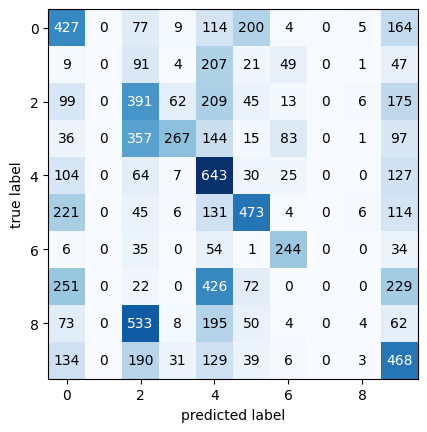

In [177]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion, )
plt.show()

In [180]:
from collections import Counter
import numpy as np

# Assuming pred_list and expected_list are your lists of predicted and expected labels
pred_list = pred
expected_list = expect

# Get the set of all unique labels from both lists
all_labels = set(pred_list).union(expected_list)

# Create dictionaries to count occurrences of each label
pred_counter = Counter(pred_list)
expected_counter = Counter(expected_list)

# Initialize an empty confusion matrix
conf_matrix = np.zeros((len(class_mapping), len(class_mapping)), dtype=int)

# Fill in the confusion matrix based on the label counters
for idx, label in enumerate(all_labels):
    pred_label_count = pred_counter[label]
    expected_label_count = expected_counter[label]
    
    # Find the index corresponding to the current label
    pred_idx = idx
    expected_idx = idx
    
    # Update the confusion matrix
    conf_matrix[expected_idx, pred_idx] = pred_label_count

print("Confusion Matrix:")
print(conf_matrix)    

SyntaxError: invalid non-printable character U+00A0 (3943612056.py, line 20)